In [1]:
from PIL import Image, ImageDraw, ImageFont
import random
import math
import os
import numpy as np
from scipy.spatial.distance import euclidean
import zipfile

In [2]:
def create_digit_images():
    digits = range(10)
    digit_images = {}
    font_size = 16
    font = ImageFont.load_default()

    for digit in digits:
        while True:
            image = Image.new('L', (16, 16), 255)
            draw = ImageDraw.Draw(image)
            
            # Get the size of the digit
            bbox = draw.textbbox((0, 0), str(digit), font=font)
            digit_width = bbox[2] - bbox[0]
            digit_height = bbox[3] - bbox[1]
            
            # Calculate maximum allowed positions
            max_x = 16 - digit_width
            max_y = 16 - digit_height
            
            # Randomly place the digit in the image, ensuring full visibility
            x = random.randint(0, max_x)
            y = random.randint(0, max_y)
            
            draw.text((x, y), str(digit), fill=0, font=font)
            
            # Check if the digit is fully visible
            bbox = draw.textbbox((x, y), str(digit), font=font)
            if bbox[0] >= 0 and bbox[1] >= 0 and bbox[2] <= 16 and bbox[3] <= 16:
                break
        
        digit_images[digit] = image.resize((16, 16), Image.NEAREST)

    return digit_images

digit_images = create_digit_images()

# Display generated digit images for verification
# for digit, img in digit_images.items():
#     img.show()

In [3]:
# After creating digit_images
output_dir = 'original_digit_images'
os.makedirs(output_dir, exist_ok=True)
for digit, img in digit_images.items():
    img.save(os.path.join(output_dir, f'digit_{digit}.png'))

In [4]:
def draw_rotated_digit(digit, angle):
    # Create a larger canvas for rotation
    large_size = (48, 48)
    image = Image.new('L', large_size, 255)
    draw = ImageDraw.Draw(image)
    
    # Use a larger font size
    font_size = 16
    font = ImageFont.truetype("arial.ttf", font_size)
    
    # Get the size of the digit
    bbox = draw.textbbox((0, 0), str(digit), font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    # Position the digit in the center of the large canvas
    position = ((large_size[0] - text_width) // 2, (large_size[1] - text_height) // 2)
    
    # Draw the digit in black
    draw.text(position, str(digit), fill=0, font=font)
    
    # Rotate the image
    rotated = image.rotate(angle, resample=Image.BICUBIC, expand=False)
    
    # Crop to the center 16x16 pixels
    left = (large_size[0] - 16) // 2
    top = (large_size[1] - 16) // 2
    right = left + 16
    bottom = top + 16
    final_image = rotated.crop((left, top, right, bottom))
    
    return final_image

def generate_rotated_digit_images():
    digits = range(10)
    angle_ranges = [(20, 40), (60, 80), (260, 290)]
    output_dir = 'rotated_digit_images'
    os.makedirs(output_dir, exist_ok=True)
    
    for digit in digits:
        for angle_range in angle_ranges:
            angle = random.randint(*angle_range)
            img = draw_rotated_digit(digit, angle)
            img.save(os.path.join(output_dir, f'digit_{digit}_angle_{angle}.png'))

generate_rotated_digit_images()

In [5]:
rotated_digit_images = generate_rotated_digit_images()

In [17]:
def draw_imperfect_digit(digit):
    image = Image.new('L', (16, 16), 255)  # White background
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    
    # Draw the digit to create points
    temp_image = Image.new('L', (16, 16), 255)
    temp_draw = ImageDraw.Draw(temp_image)
    temp_draw.text((0, 0), str(digit), fill=0, font=font)
    
    # Collect points where the digit is drawn
    points = []
    for x in range(16):
        for y in range(16):
            if temp_image.getpixel((x, y)) == 0:  # If pixel is black (part of the digit)
                points.append((x, y))
    
    # Create imperfect points
    imperfect_points = []
    for x, y in points:
        # Add small random offsets to create imperfections
        offset_x = random.uniform(-1, 1)
        offset_y = random.uniform(-1, 1)
        imperfect_points.append((x + offset_x, y + offset_y))
    
    # Draw imperfect lines connecting the points
    for i in range(len(imperfect_points) - 1):
        start = imperfect_points[i]
        end = imperfect_points[i + 1]
        
        # Create a slightly curved line between points
        num_segments = 5
        for t in range(num_segments):
            t1 = t / num_segments
            t2 = (t + 1) / num_segments
            
            # Add some randomness to the curve
            curve_offset = random.uniform(-0.5, 0.5)
            
            x1 = start[0] * (1 - t1) + end[0] * t1 + curve_offset
            y1 = start[1] * (1 - t1) + end[1] * t1 + curve_offset
            x2 = start[0] * (1 - t2) + end[0] * t2 + curve_offset
            y2 = start[1] * (1 - t2) + end[1] * t2 + curve_offset
            
            draw.line([(x1, y1), (x2, y2)], fill=0, width=1)
    
    return image

def generate_imperfect_digit_images():
    digits = range(10)
    output_dir = 'imperfect_digit_images'
    os.makedirs(output_dir, exist_ok=True)
    
    for digit in digits:
        for i in range(5):  # Generate 5 imperfect versions of each digit
            img = draw_imperfect_digit(digit)
            img.save(os.path.join(output_dir, f'digit_{digit}_imperfect_{i}.png'))

generate_imperfect_digit_images()

In [6]:
def draw_cursive_digit(digit):
    # Create a larger image to draw the digit
    large_size = (64, 64)
    image = Image.new('L', large_size, 255)
    draw = ImageDraw.Draw(image)

    # Use a cursive font
    font_size = 48
    try:
        font = ImageFont.truetype("BRUSHSCI.TTF", font_size)  # Brush Script MT
    except IOError:
        font = ImageFont.truetype("ITCEDSCR.TTF", font_size)  # Edwardian Script ITC
    except IOError:
        font = ImageFont.truetype("VIVALDII.TTF", font_size)  # Vivaldi

    # Draw the digit
    draw.text((32, 32), str(digit), font=font, fill=0, anchor="mm")

    # Resize to 16x16
    image = image.resize((16, 16), Image.LANCZOS)

    # Convert to numpy array
    img_array = np.array(image)

    # Threshold to make it binary
    img_array[img_array < 128] = 0
    img_array[img_array >= 128] = 255

    return Image.fromarray(img_array)

def generate_cursive_digit_images():
    digits = range(10)
    output_dir = 'cursive_digit_images'
    os.makedirs(output_dir, exist_ok=True)
    
    for digit in digits:
        img = draw_cursive_digit(digit)
        img.save(os.path.join(output_dir, f'digit_{digit}_cursive.png'))

generate_cursive_digit_images()

Now we have a set of original images, cursive, and original font but rotated at funny angles, these serve as our artificial mental representations to simulate paraedolia.

In [20]:
import os
import numpy as np
from PIL import Image
from scipy.spatial.distance import euclidean

def create_random_stimuli(n=1000):
    return np.random.randint(0, 256, size=(n, 16, 16), dtype=np.uint8)

def vectorize_image(image):
    return np.array(image).flatten()

def select_most_similar(prototype, stimuli, n=10):
    prototype_vec = vectorize_image(prototype)
    distances = [euclidean(prototype_vec, vectorize_image(stim)) for stim in stimuli]
    return np.argsort(distances)[:n]

def process_digit(digit, stimuli, output_folder):
    # Load prototype
    prototype = Image.open(f'original_digit_images/digit_{digit}.png').convert('L')
    
    selections = []
    for i in range(10):  # 10 trials
        trial_stimuli = stimuli[i*100:(i+1)*100]
        selected = select_most_similar(prototype, trial_stimuli)
        selections.extend(selected + i*100)
    
    # Save selected stimuli
    os.makedirs(output_folder, exist_ok=True)
    for i, idx in enumerate(selections):
        Image.fromarray(stimuli[idx]).save(f'{output_folder}/digit_{digit}_selection_{i:03d}.png')

def main():
    # Create 1000 random grayscale stimuli
    stimuli = create_random_stimuli(1000)
    
    # Process each digit
    for digit in range(10):
        output_folder = f'selected_stimuli/digit_{digit}'
        process_digit(digit, stimuli, output_folder)

if __name__ == '__main__':
    main()

In [22]:
import os
import numpy as np
from PIL import Image
from skimage import exposure

PIXEL_SIZE = 16

def load_and_normalize_image(path):
    img = np.array(Image.open(path).convert('L')).astype(np.float32)
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def create_composite_image(digit, start, end, output_folder):
    images = []
    for i in range(start, end):
        img_path = f'selected_stimuli/digit_{digit}/digit_{digit}_selection_{i:03d}.png'
        img = load_and_normalize_image(img_path)
        images.append(img)

    # Average the normalized images
    composite = np.mean(images, axis=0)

    # Apply contrast enhancement
    composite = exposure.equalize_hist(composite)

    # Convert to uint8
    composite = (composite * 255).astype(np.uint8)

    # Save the composite image
    os.makedirs(output_folder, exist_ok=True)
    Image.fromarray(composite).save(f'{output_folder}/digit_{digit}_composite_{start}_{end}.png')

def create_composites_for_digit(digit):
    output_folder = 'composite_images'
    
    create_composite_image(digit, 0, 50, output_folder)
    create_composite_image(digit, 50, 100, output_folder)
    create_composite_image(digit, 0, 100, output_folder)

def main():
    for digit in range(10):
        create_composites_for_digit(digit)

if __name__ == '__main__':
    main()

In [30]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import zipfile

PIXEL_SIZE = 16
NUM_TRIALS = 100
DIGITS = list(range(10))
PARTICIPANT_ID = str(random.randint(0, 99)).zfill(2)

all_images = {}

def create_target_image(digit):
    image = Image.new('L', (PIXEL_SIZE, PIXEL_SIZE), 255)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    draw.text((PIXEL_SIZE // 2, PIXEL_SIZE // 2), str(digit), fill=0, font=font, anchor='mm')
    return np.array(image)

def vectorize_image(image):
    return image.flatten()

def calculate_similarity(vec1, vec2):
    return np.sum((vec1 - vec2) ** 2)

def generate_whitenoise_image():
    return np.random.randint(0, 256, size=(PIXEL_SIZE, PIXEL_SIZE), dtype=np.uint8)

def create_auto_select_trial(digit, trial_number):
    target_image = create_target_image(digit)
    target_vector = vectorize_image(target_image)
    stimuli = [generate_whitenoise_image() for _ in range(10)]

    similarities = [calculate_similarity(target_vector, vectorize_image(stim)) for stim in stimuli]
    most_similar_index = np.argmin(similarities)

    selected_image = stimuli[most_similar_index]
    image_name = f'{digit}_trial_{trial_number}_selection_participant{PARTICIPANT_ID}'
    all_images[image_name] = selected_image

    return selected_image

def create_composite_image(digit):
    relevant_images = [img for key, img in all_images.items() if key.startswith(f'{digit}_trial_')]
    sum_image = np.sum(relevant_images, axis=0).astype(np.float32)

    min_val = np.min(sum_image)
    max_val = np.max(sum_image)
    range_val = max_val - min_val if max_val != min_val else 1

    normalized = (sum_image - min_val) / range_val * 255
    return normalized.astype(np.uint8)

def download_all_images():
    with zipfile.ZipFile(f'experiment_results_participant{PARTICIPANT_ID}.zip', 'w') as zip_file:
        for name, image in all_images.items():
            img = Image.fromarray(image, mode='L')
            img.save(f'{name}.png')
            zip_file.write(f'{name}.png')
            os.remove(f'{name}.png')

        for digit in DIGITS:
            composite_image = create_composite_image(digit)
            composite_pil = Image.fromarray(composite_image, mode='L')
            composite_pil.save(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            zip_file.write(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            os.remove(f'{digit}_composite_participant{PARTICIPANT_ID}.png')

# Running the trials
for digit in DIGITS:
    for trial in range(1, NUM_TRIALS + 1):
        create_auto_select_trial(digit, trial)

# Download all images at the end
download_all_images()

# Verification step
def verify_grayscale():
    with zipfile.ZipFile(f'experiment_results_participant{PARTICIPANT_ID}.zip', 'r') as zip_file:
        for filename in zip_file.namelist():
            with zip_file.open(filename) as file:
                img = Image.open(file)
                if img.mode != 'L':
                    print(f"Warning: {filename} is not grayscale!")
                else:
                    print(f"{filename} is grayscale.")

verify_grayscale()

0_trial_1_selection_participant59.png is grayscale.
0_trial_2_selection_participant59.png is grayscale.
0_trial_3_selection_participant59.png is grayscale.
0_trial_4_selection_participant59.png is grayscale.
0_trial_5_selection_participant59.png is grayscale.
0_trial_6_selection_participant59.png is grayscale.
0_trial_7_selection_participant59.png is grayscale.
0_trial_8_selection_participant59.png is grayscale.
0_trial_9_selection_participant59.png is grayscale.
0_trial_10_selection_participant59.png is grayscale.
0_trial_11_selection_participant59.png is grayscale.
0_trial_12_selection_participant59.png is grayscale.
0_trial_13_selection_participant59.png is grayscale.
0_trial_14_selection_participant59.png is grayscale.
0_trial_15_selection_participant59.png is grayscale.
0_trial_16_selection_participant59.png is grayscale.
0_trial_17_selection_participant59.png is grayscale.
0_trial_18_selection_participant59.png is grayscale.
0_trial_19_selection_participant59.png is grayscale.
0_

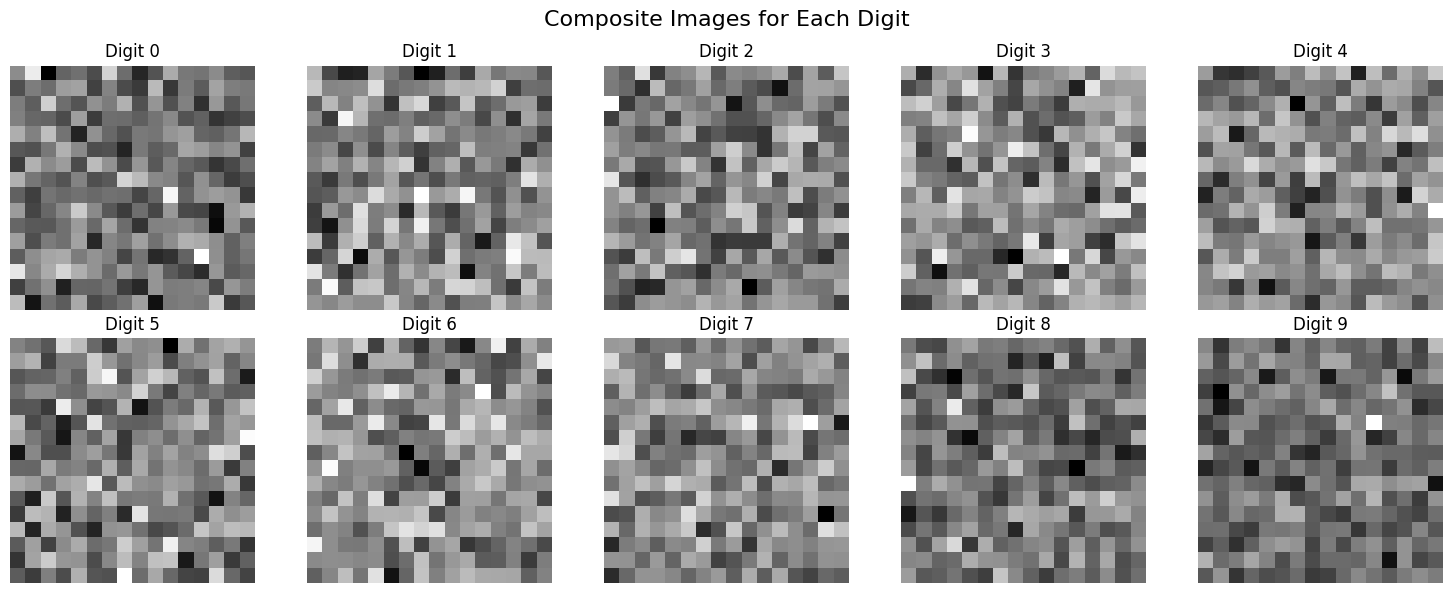

In [33]:
import matplotlib.pyplot as plt

def visualize_composites():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle("Composite Images for Each Digit", fontsize=16)
    
    for digit, ax in zip(DIGITS, axes.flatten()):
        composite_image = create_composite_image(digit)
        ax.imshow(composite_image, cmap='gray')
        ax.set_title(f'Digit {digit}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to visualize composites
visualize_composites()

In [35]:
def verify_saved_images():
    for digit in DIGITS:
        path = f'selected_stimuli/digit_{digit}'
        if os.path.exists(path):
            files = os.listdir(path)
            print(f"Digit {digit}: {len(files)} images saved")
        else:
            print(f"No directory found for digit {digit}")

In [36]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import zipfile
import matplotlib.pyplot as plt

PIXEL_SIZE = 16
NUM_TRIALS = 100
DIGITS = list(range(10))
PARTICIPANT_ID = str(random.randint(0, 99)).zfill(2)

all_images = {}

def create_target_image(digit):
    image = Image.new('L', (PIXEL_SIZE, PIXEL_SIZE), 255)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    draw.text((PIXEL_SIZE // 2, PIXEL_SIZE // 2), str(digit), fill=0, font=font, anchor='mm')
    return np.array(image)

def vectorize_image(image):
    return image.flatten()

def calculate_similarity(vec1, vec2):
    return np.sum((vec1 - vec2) ** 2)

def generate_whitenoise_image():
    return np.random.randint(0, 256, size=(PIXEL_SIZE, PIXEL_SIZE), dtype=np.uint8)

def create_auto_select_trial(digit, trial_number):
    target_image = create_target_image(digit)
    target_vector = vectorize_image(target_image)
    stimuli = [generate_whitenoise_image() for _ in range(10)]

    similarities = [calculate_similarity(target_vector, vectorize_image(stim)) for stim in stimuli]
    most_similar_index = np.argmin(similarities)

    selected_image = stimuli[most_similar_index]
    image_name = f'digit_{digit}_selection_{trial_number:03d}'
    
    # Save the selected image
    os.makedirs(f'selected_stimuli/digit_{digit}', exist_ok=True)
    Image.fromarray(selected_image).save(f'selected_stimuli/digit_{digit}/{image_name}.png')

    all_images[image_name] = selected_image

def create_composite_image(digit):
    relevant_images = [img for key, img in all_images.items() if key.startswith(f'{digit}_trial_')]
    sum_image = np.sum(relevant_images, axis=0).astype(np.float32)

    # Normalize the composite image
    min_val = np.min(sum_image)
    max_val = np.max(sum_image)
    range_val = max_val - min_val if max_val != min_val else 1

    normalized = (sum_image - min_val) / range_val * 255
    return normalized.astype(np.uint8)

def download_all_images():
    with zipfile.ZipFile(f'experiment_results_participant{PARTICIPANT_ID}.zip', 'w') as zip_file:
        for name, image in all_images.items():
            img = Image.fromarray(image, mode='L')
            img.save(f'{name}.png')
            zip_file.write(f'{name}.png')
            os.remove(f'{name}.png')

        for digit in DIGITS:
            composite_image = create_composite_image(digit)
            composite_pil = Image.fromarray(composite_image, mode='L')
            composite_pil.save(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            zip_file.write(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            os.remove(f'{digit}_composite_participant{PARTICIPANT_ID}.png')

def visualize_composites():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle("Composite Images for Each Digit", fontsize=16)

    for digit, ax in zip(DIGITS, axes.flatten()):
        composite_image = create_composite_image(digit)
        ax.imshow(composite_image, cmap='gray')
        ax.set_title(f'Digit {digit}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Running the trials
for digit in DIGITS:
    for trial in range(1, NUM_TRIALS + 1):
        create_auto_select_trial(digit, trial)

# Download all images at the end
download_all_images()

# Call this function after running all trials
verify_saved_images()

# Visualize composites
visualize_composites()

IndexError: tuple index out of range

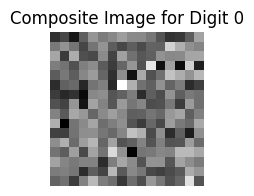

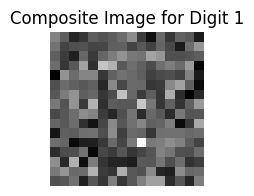

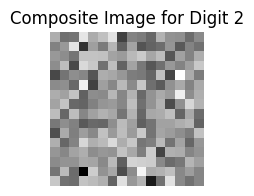

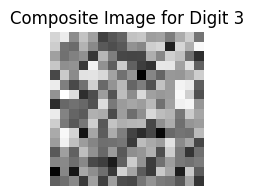

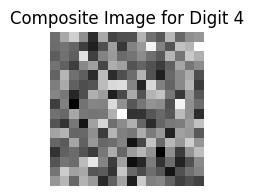

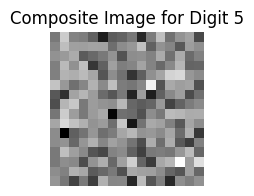

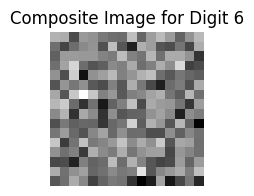

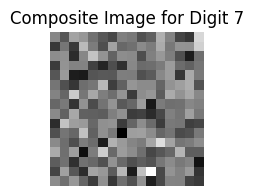

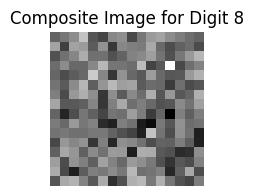

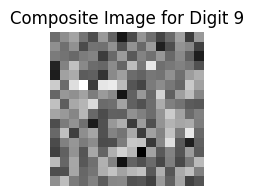

In [37]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import zipfile
import matplotlib.pyplot as plt

PIXEL_SIZE = 16
NUM_TRIALS = 100
DIGITS = list(range(10))
PARTICIPANT_ID = str(random.randint(0, 99)).zfill(2)

all_images = {}

def create_target_image(digit):
    image = Image.new('L', (PIXEL_SIZE, PIXEL_SIZE), 255)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    draw.text((PIXEL_SIZE // 2, PIXEL_SIZE // 2), str(digit), fill=0, font=font, anchor='mm')
    return np.array(image)

def vectorize_image(image):
    return image.flatten()

def calculate_similarity(vec1, vec2):
    return np.sum((vec1 - vec2) ** 2)

def generate_whitenoise_image():
    return np.random.randint(0, 256, size=(PIXEL_SIZE, PIXEL_SIZE), dtype=np.uint8)

def create_auto_select_trial(digit, trial_number):
    target_image = create_target_image(digit)
    target_vector = vectorize_image(target_image)
    stimuli = [generate_whitenoise_image() for _ in range(10)]

    similarities = [calculate_similarity(target_vector, vectorize_image(stim)) for stim in stimuli]
    most_similar_index = np.argmin(similarities)

    selected_image = stimuli[most_similar_index]
    image_name = f'digit_{digit}_selection_{trial_number:03d}'
    
    # Save the selected image
    os.makedirs(f'selected_stimuli/digit_{digit}', exist_ok=True)
    Image.fromarray(selected_image).save(f'selected_stimuli/digit_{digit}/{image_name}.png')

    all_images[image_name] = selected_image

def create_composite_image(digit):
    relevant_images = [img for key, img in all_images.items() if key.startswith(f'digit_{digit}_')]
    
    if not relevant_images:
        print(f"No images found for digit {digit}.")
        return np.zeros((PIXEL_SIZE, PIXEL_SIZE), dtype=np.uint8)

    sum_image = np.sum(relevant_images, axis=0).astype(np.float32)

    min_val = np.min(sum_image)
    max_val = np.max(sum_image)
    range_val = max_val - min_val if max_val != min_val else 1

    normalized = (sum_image - min_val) / range_val * 255
    return normalized.astype(np.uint8)

def download_all_images():
    with zipfile.ZipFile(f'experiment_results_participant{PARTICIPANT_ID}.zip', 'w') as zip_file:
        for name, image in all_images.items():
            img = Image.fromarray(image, mode='L')
            img.save(f'{name}.png')
            zip_file.write(f'{name}.png')
            os.remove(f'{name}.png')

        for digit in DIGITS:
            composite_image = create_composite_image(digit)
            composite_pil = Image.fromarray(composite_image, mode='L')
            composite_pil.save(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            zip_file.write(f'{digit}_composite_participant{PARTICIPANT_ID}.png')
            os.remove(f'{digit}_composite_participant{PARTICIPANT_ID}.png')

# Running the trials
for digit in DIGITS:
    for trial in range(1, NUM_TRIALS + 1):
        create_auto_select_trial(digit, trial)

# Download all images at the end
download_all_images()

# Visualize composites
for digit in DIGITS:
    composite_image = create_composite_image(digit)
    plt.figure(figsize=(2, 2))
    plt.imshow(composite_image, cmap='gray')
    plt.title(f'Composite Image for Digit {digit}')
    plt.axis('off')
    plt.show()